In [1]:
%matplotlib inline
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

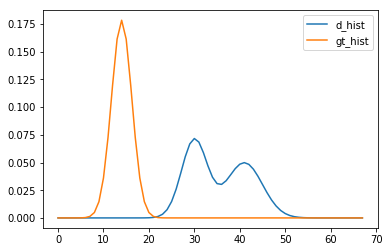

In [83]:
N = 68
cost_mat = np.array([[(i - j)**2 for i in range(N)] for j in range(N)])
cost_mat = cost_mat/np.max(cost_mat)
def gaussian(mean, var, N):
    hist = np.array([np.exp(-(i - mean)**2/(2*var)) for i in range(N)])
    hist /= np.sum(hist)
    return hist

gt_hist = gaussian(14, 5, N)
hist2 = gaussian(30, 8, N)
hist3 = gaussian(41, 16, N)
d_hist = (hist2 + hist3)/(np.sum(hist2 + hist3))
plt.plot(d_hist, label="d_hist");
plt.plot(gt_hist, label="gt_hist");
plt.legend();

In [94]:
def wasserstein_loss(hist0, hist1, cost_mat, **solver_kwargs):
    """
    :param hist0: (N,) numpy array, summing to 1
    :param hist1: (N,) numpy array, summing to 1
    :param cost_mat: (N, N) numpy array
    """
    assert hist0.shape == hist1.shape
    assert len(hist0.shape) == 1
    assert len(cost_mat.shape) == 2
    assert cost_mat.shape[0] == cost_mat.shape[1]
    assert hist0.shape[0] == cost_mat.shape[0]
    N = hist0.shape[0]
    T = cp.Variable((N, N))
    obj = cp.Minimize(cp.trace(T.T*cost_mat))
    constr = [
        cp.sum(T, axis=0) == hist0,
        cp.sum(T, axis=1) == hist1,
        T >= 0.
    ]
    prob = cp.Problem(obj, constr)
    prob.solve(solver="OSQP", **solver_kwargs)
    return prob.value, T.value

In [95]:
val, T = wasserstein_loss(d_hist, gt_hist, cost_mat, eps_abs=1e-10)
T[T < 0] = 0.

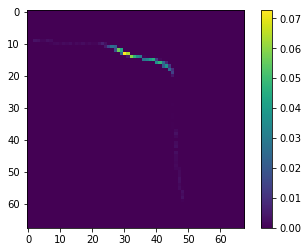

In [92]:
plt.imshow(T);
plt.colorbar()

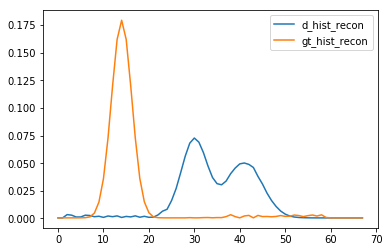

In [93]:
plt.plot(np.sum(T, axis=0), label="d_hist_recon")
plt.plot(np.sum(T, axis=1), label="gt_hist_recon")
plt.legend();